In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc

# Default number of currencies we will look at at each step
x = 10

In [2]:
df = pd.read_csv('crypto-markets.csv')

In [3]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [4]:
# Transform date to date object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [5]:
print("Latest crypto data")
latest_df = df[df['date'] == max(df['date'])]
latest_df.head()

Latest crypto data


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1744,bitcoin,BTC,Bitcoin,2018-02-05,1,8270.540000,8364.840000,6756.680000,6955.270000,9285290000,139325000000,0.1235,1608.16
2658,ethereum,ETH,Ethereum,2018-02-05,2,834.960000,856.650000,644.600000,697.950000,4269530000,81337400000,0.2516,212.05
4305,ripple,XRP,Ripple,2018-02-05,3,0.825943,0.833866,0.675827,0.691799,1286180000,32219400000,0.1011,0.16
4503,bitcoin-cash,BCH,Bitcoin Cash,2018-02-05,4,1159.890000,1172.700000,839.950000,887.410000,568117000,19659800000,0.1426,332.75
4631,cardano,ADA,Cardano,2018-02-05,5,0.385044,0.399523,0.319646,0.327371,658548000,9983060000,0.0967,0.08


In [6]:
# Number of cryptocurrencies listed
#latest_df.shape
print("Number of cryptocurrencies listed")
latest_df['symbol'].nunique()

Number of cryptocurrencies listed


1461

In [8]:
# What start date do we have for each cryptocurrency?
x=10
start_df = pd.DataFrame({'start_date' : df.groupby( [ "name", "ranknow"] )['date'].min()}).reset_index()

# List the oldest ones
print("Oldest Cryptocurrencies")
start_df.sort_values(['start_date']).head(x)

Oldest Cryptocurrencies


,name,ranknow,start_date
155,Bitcoin,1,2013-04-28
789,Litecoin,6,2013-04-28
916,Novacoin,483,2013-04-28
983,Peercoin,148,2013-04-28
1287,Terracoin,582,2013-04-28
890,Namecoin,241,2013-04-28
844,Mincoin,1006,2013-05-03
555,Freicoin,1016,2013-05-03
528,Feathercoin,269,2013-05-03
720,Ixcoin,923,2013-05-08


In [9]:
# List the newest ones
print("Newest Cryptocurrencies")
start_df.sort_values(['start_date']).tail(x)

Newest Cryptocurrencies


,name,ranknow,start_date
864,Monero Gold,1247,2018-02-02
1139,STK,1165,2018-02-02
970,Pareto Network,1288,2018-02-02
664,Huobi Token,1155,2018-02-03
361,DMarket,1308,2018-02-03
1477,adbank,1241,2018-02-03
1260,SwissBorg,1253,2018-02-03
1467,Zilla,1179,2018-02-03
719,Iungo,1242,2018-02-04
725,Jibrel Network,1158,2018-02-05


In [10]:
# Get a list of the top x currencies
latest_df[latest_df['ranknow'] <= x].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2         [Ethereum]
3           [Ripple]
4     [Bitcoin Cash]
5          [Cardano]
6         [Litecoin]
7              [NEO]
8          [Stellar]
9              [EOS]
10             [NEM]
Name: name, dtype: object

In [11]:
# Is ranknow ordering the same as the marketcap ordering?
latest_df.sort_values(by=['market'], ascending=[False])
latest_df[['name','market']].head(x)

# Answer: Yes

,name,market
1744,Bitcoin,139325000000
2658,Ethereum,81337400000
4305,Ripple,32219400000
4503,Bitcoin Cash,19659800000
4631,Cardano,9983060000
6376,Litecoin,8190580000
6891,NEO,6992380000
8172,Stellar,7064590000
8392,EOS,5618380000
9434,NEM,4940820000


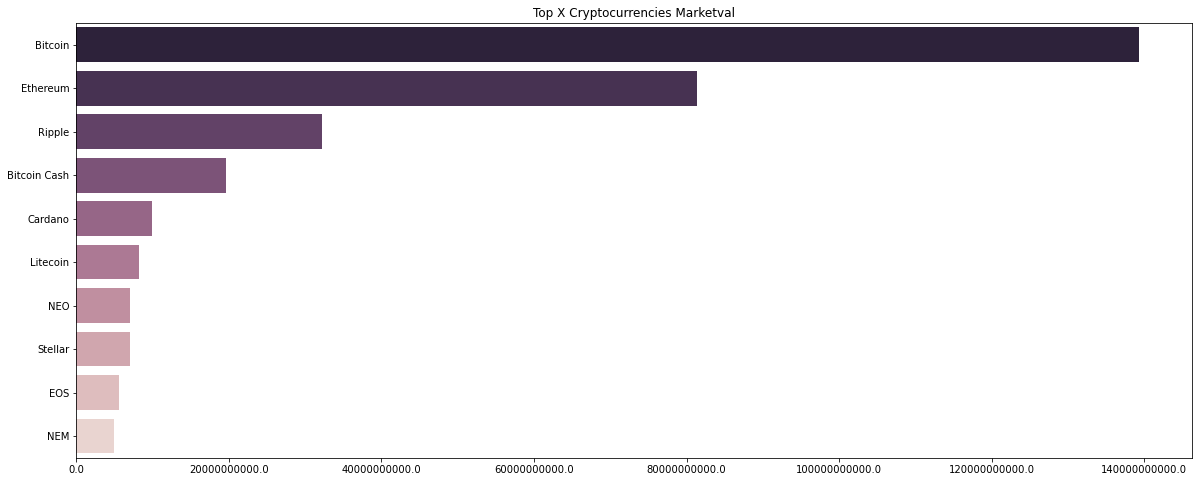

In [12]:
# Plot the top X currencies latest marketval
name = latest_df['name'].unique()
currency  = []
marketval = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     marketval.append(filtered['market'].values[0])

f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = marketval, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Marketval")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

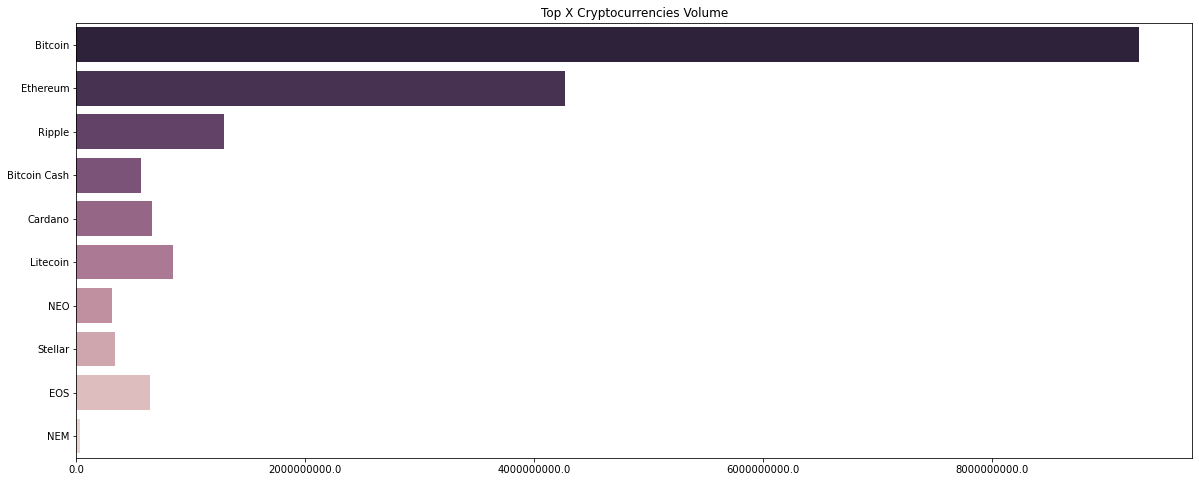

In [13]:
# Plot the top X currencies latest volume 
latest_df
currency  = []
volume = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     volume.append(filtered['volume'].values[0])
        
f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = volume, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Volume")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

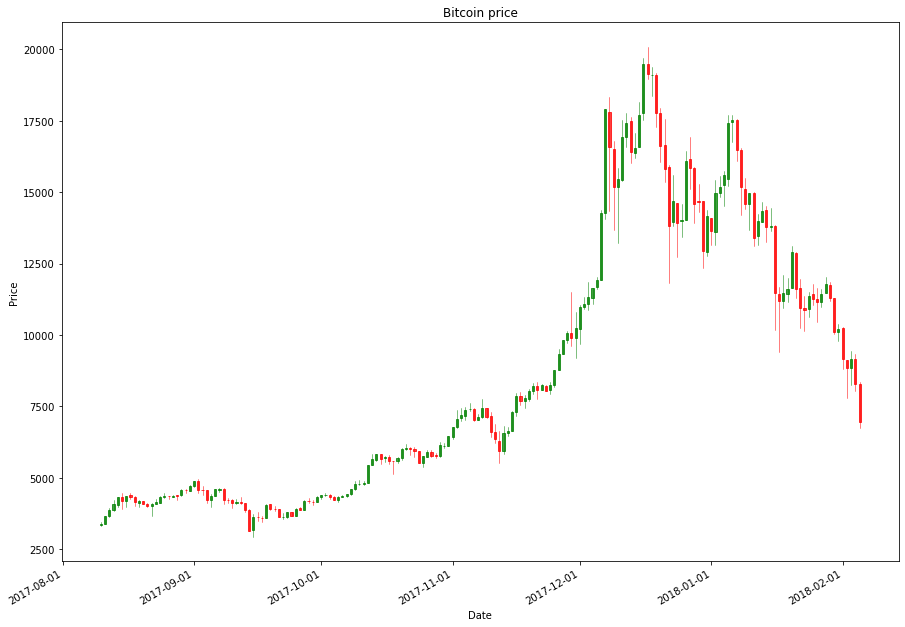

In [23]:
# Candlestick chart for Rank 1 currency (limited to 6 Months)
rank = 1
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

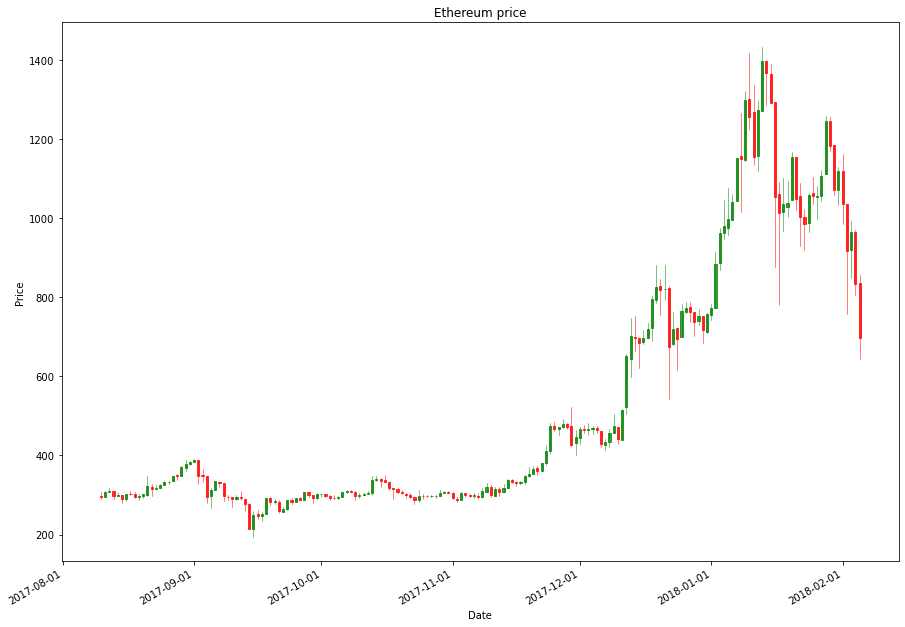

In [24]:
# Candlestick chart for Rank 2 currency (limited to 6 Months)
rank = 2
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

# Moving averages are one of the oldest and simplest tradng "tools" which we can use.

A n-day moving average is, for a series and a point in time, the average of the past n days.

Moving averages smooth a series and helps identify trends. The larger n is, the less responsive a moving average process is to short-term fluctuations in the series. The idea is that moving average processes help identify trends from “noise”.

Exponentially Weighted Moving Average is a statistic for monitoring the process that averages the data in a way that gives less and less weight to data as they are further removed in time.


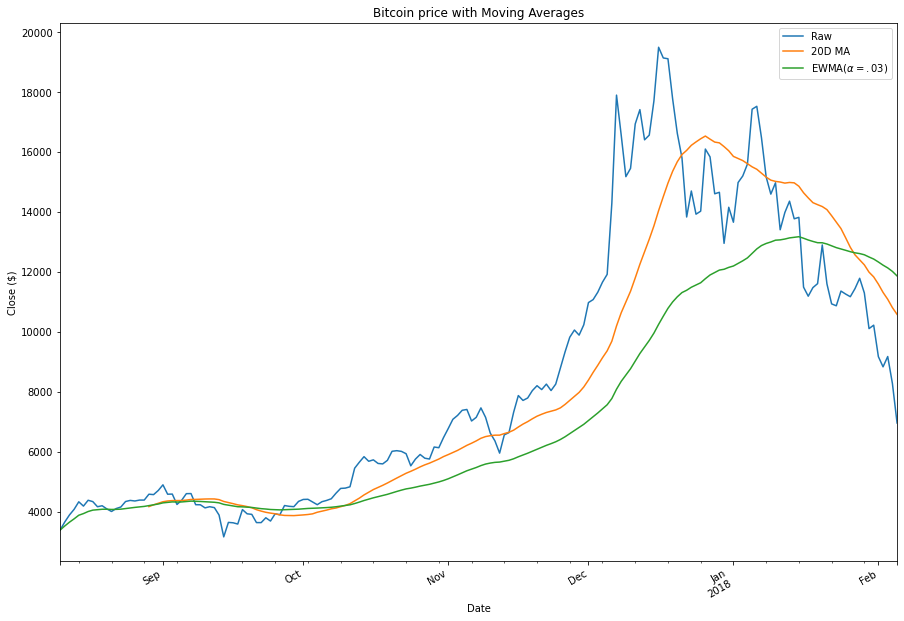

In [25]:
# Moving average chart for Rank 1 currency (6 months)
rank = 1
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

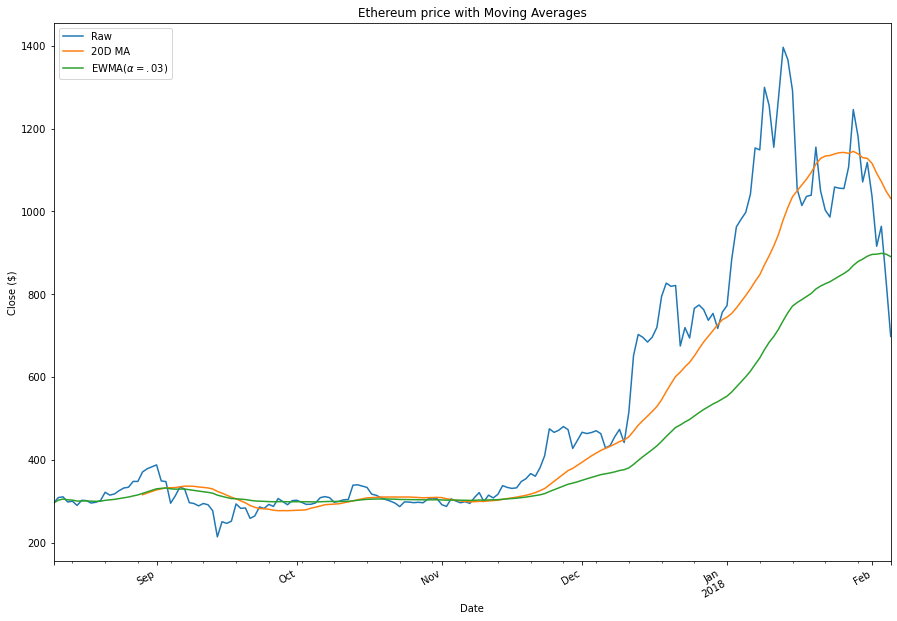

In [26]:
# Moving average chart for Rank 2 currency (6 months)
rank = 2
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

Some consider there to be three important moving averages that can be applied to charts to help trade better. They are the following:

The 20 moving average (20MA) is the short-term outlook.
The 50 moving average (50MA) is the medium term outlook.
The 200 moving average (200MA) is the trend bias.
In a good uptrend the price should be above the 20MA, the 20MA above the 50MA and the 50MA above the 200MA. In a solid downtrend the price will be below the 20MA, the 20MA below the 50MA and the 50MA below the 200MA.

Lets see how this can apply to Bitcoin and Ethereum..

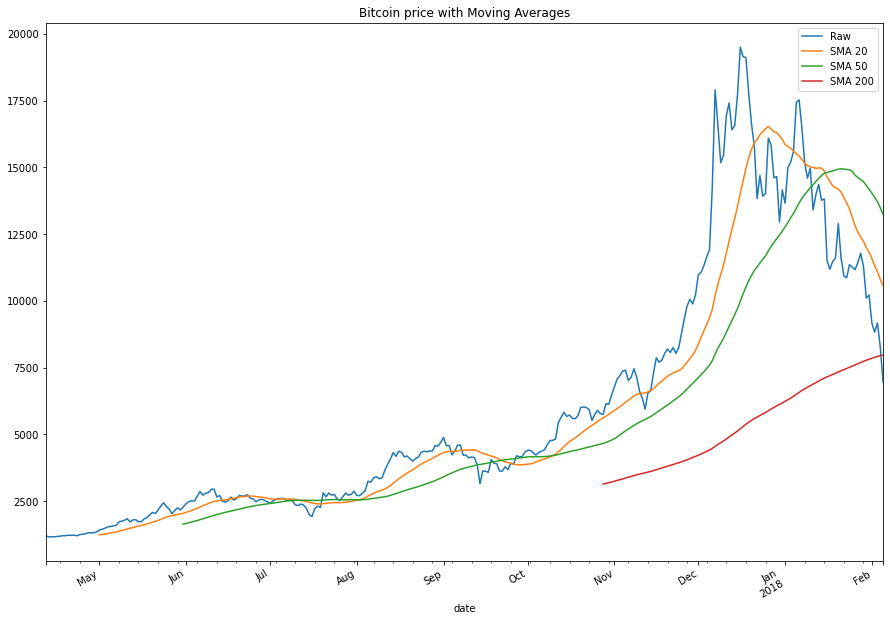

In [27]:
# Moving average chart for Rank 1 currency (10 months)
rank = 1
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
 
smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(15, 11), legend=True, title=name + " price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()

We can observe the classic uptrend between mid November 2017, after the raw crosses the 20 SMA, and mid December 2017 where the raw crosses back below the 20 SMA. After that the 20 SMA also crosses the 50 SMA signalling a downtrend.

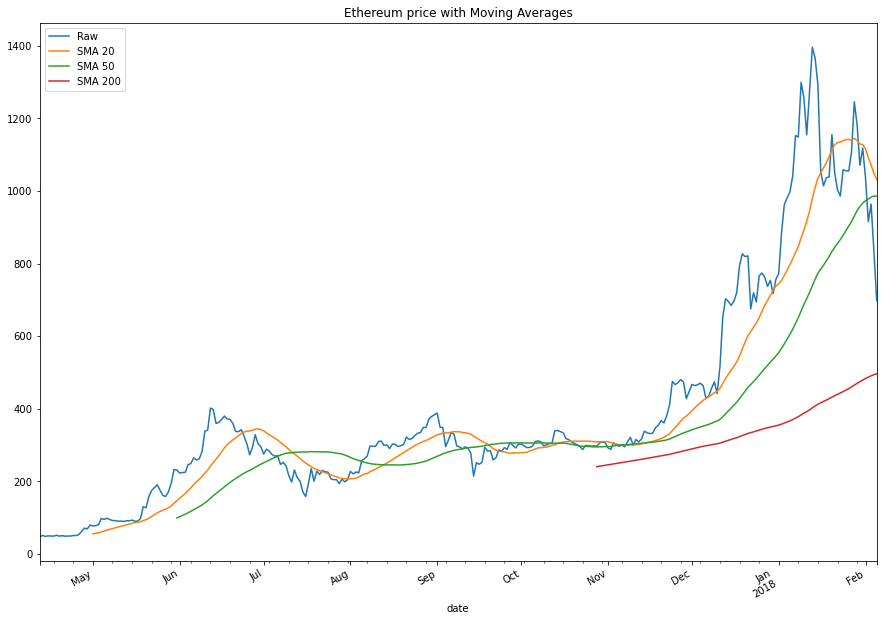

In [28]:
# Moving average chart for Rank 2 currency (10 months)
rank = 2
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
 
smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(15, 11), legend=True, title=name + " price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()


Ethereum had a similar trend as Bitcoin but never such a strong downturn as the 20 SMA never crossed back below the 50 SMA after the November bull run.